In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [8]:
dataset = pd.read_csv("training.1600000.processed.noemoticon.csv" , encoding= 'ISO-8859-1')

In [9]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
col_names = ['target' , 'id' , 'date' , 'flag' , 'user' , 'text']
dataset.columns = col_names

In [11]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
dataset.shape

(1599999, 6)

In [13]:
#checking for missing values
dataset.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [14]:
# Distribution of tweets
dataset['target'].value_counts()

,count
target,
4,800000
0,799999


In [15]:
# Converting 0 to -ve and 4 to +ve
dataset['target'] = dataset['target'].map({0:0 , 4:1})

In [16]:
dataset['target'].value_counts()

,count
target,
1,800000
0,799999


In [17]:
stremmer = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # removing not a-z and A-Z
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stremmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
from tqdm import tqdm
tqdm.pandas()

dataset['text'] = dataset['text'].progress_apply(stemming)


100%|██████████| 1599999/1599999 [41:06<00:00, 648.72it/s]


In [19]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset updat facebook text might cri result sch...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save rest g...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew


In [21]:
x = dataset['text']
y = dataset['target']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# convert textual data to numerical data
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [25]:
from tqdm import tqdm
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=20, n_jobs=-1)
}

results = {}
conf_matrices = {}

# Train models with tqdm for progress tracking
for name, model in tqdm(models.items(), desc="Training Models"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)


Training Models: 100%|██████████| 4/4 [2:08:44<00:00, 1931.20s/it]


<ipython-input-26-b82b5a97903f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette=colors)


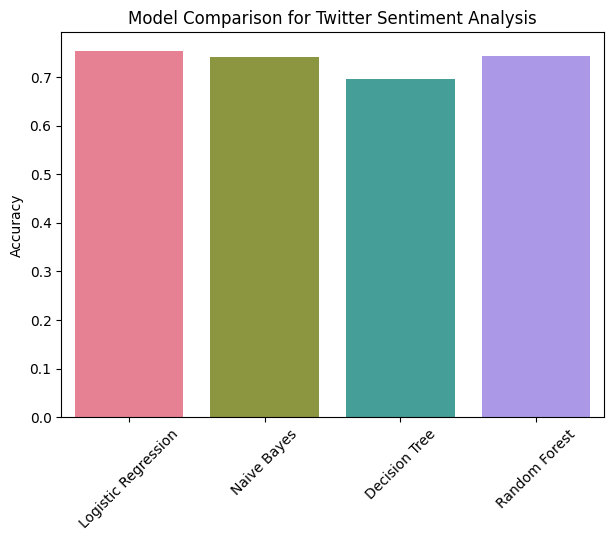

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))
colors = sns.color_palette("husl", len(results))  # Different colors for each bar
sns.barplot(x=list(results.keys()), y=list(results.values()), palette=colors)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison for Twitter Sentiment Analysis")
plt.show()


In [27]:
accuracy_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)
print("\nModel Accuracy Comparison:")
print(accuracy_df.to_string(index=False))


Model Accuracy Comparison:
              Model  Accuracy
Logistic Regression  0.754203
      Random Forest  0.743400
        Naive Bayes  0.740619
      Decision Tree  0.696806


<ipython-input-28-d3f9236f649e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="pastel")


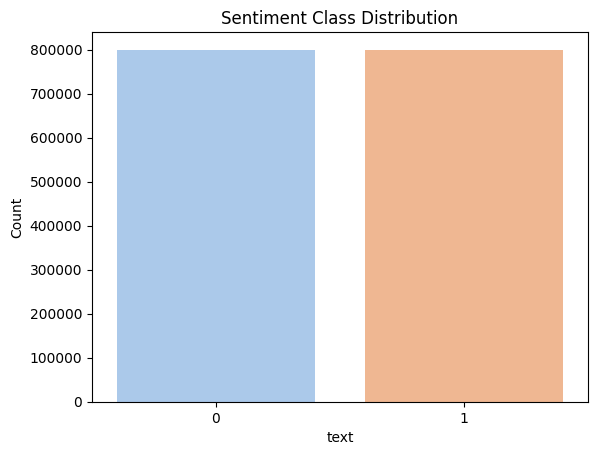

In [28]:
sns.countplot(x=y, palette="pastel")
plt.title("Sentiment Class Distribution")
plt.xlabel("text")
plt.ylabel("Count")
plt.show()

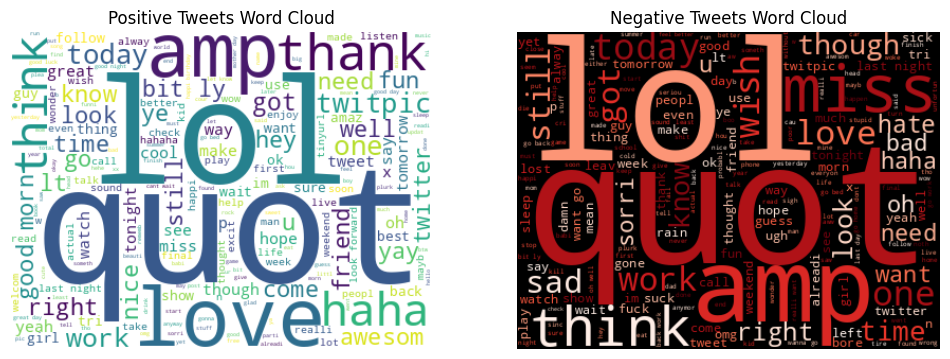

In [31]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiment
positive_tweets = " ".join(dataset[dataset["target"] == 1]["text"])
negative_tweets = " ".join(dataset[dataset["target"] == 0]["text"])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

wordcloud_pos = WordCloud(width=400, height=300, background_color="white").generate(positive_tweets)
ax[0].imshow(wordcloud_pos, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Positive Tweets Word Cloud")

wordcloud_neg = WordCloud(width=400, height=300, background_color="black", colormap="Reds").generate(negative_tweets)
ax[1].imshow(wordcloud_neg, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Negative Tweets Word Cloud")

plt.show()


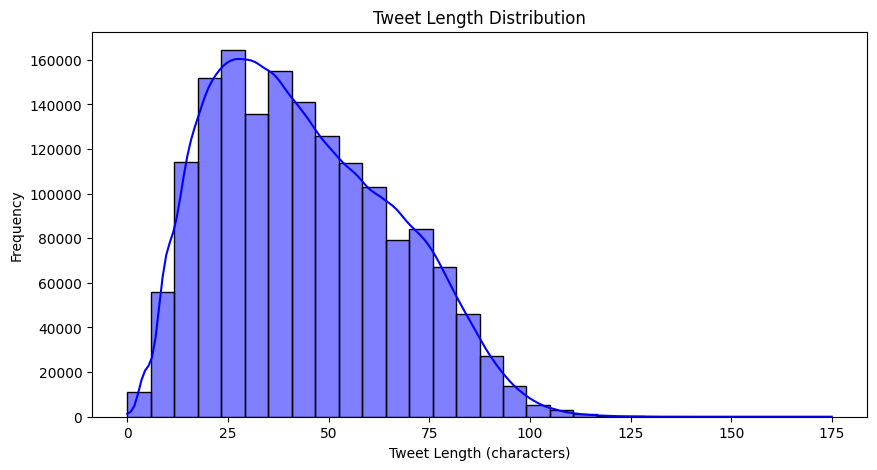

In [41]:
dataset["tweet_length"] = dataset["text"].apply(lambda x: len(x))

# **Histogram of Tweet Lengths**
plt.figure(figsize=(10, 5))
sns.histplot(dataset["tweet_length"], bins=30, kde=True, color="blue")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.title("Tweet Length Distribution")
plt.show()

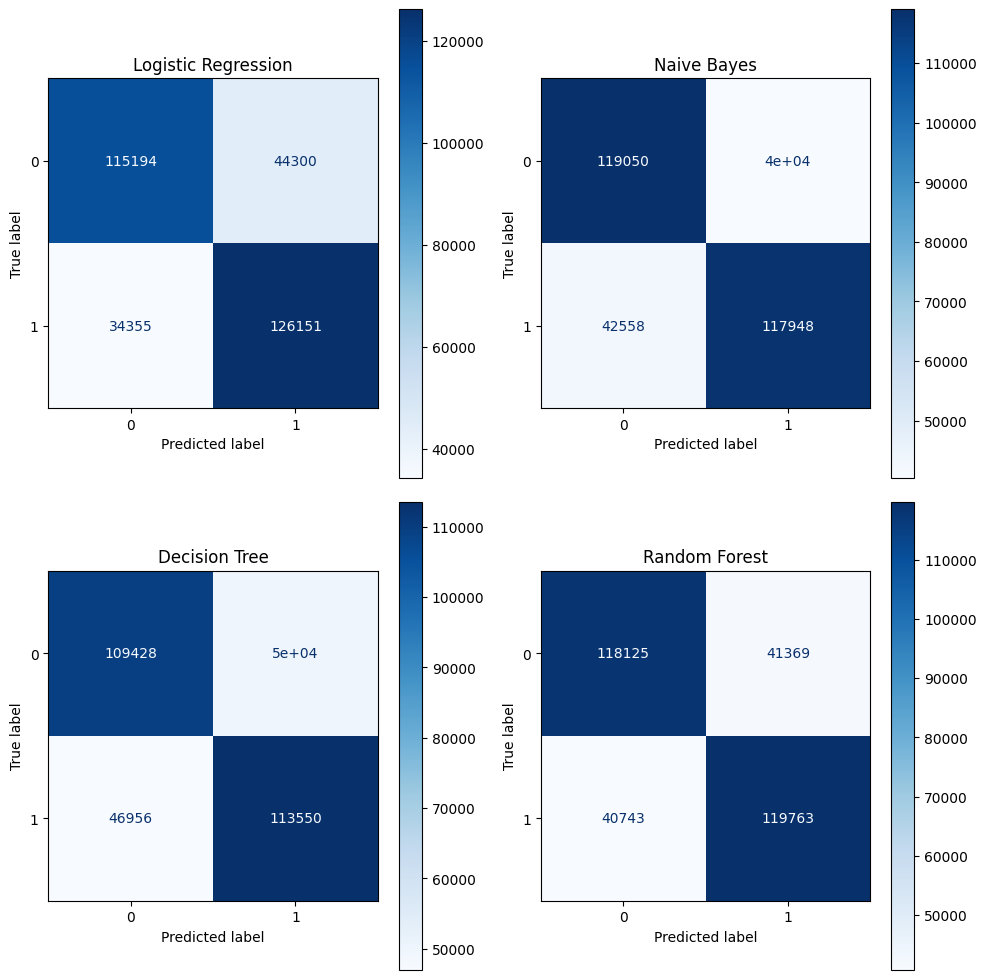

In [32]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
for i, (name, cm) in enumerate(conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(name)
plt.tight_layout()
plt.show()


In [35]:
import pickle
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
pickle.dump(models, open('logistic_regression.sav', 'wb'))
print("Logistic Regression model and vectorizer saved successfully!")


Logistic Regression model and vectorizer saved successfully!


In [38]:
loaded_vectorizer = pickle.load(open('vectorizer.sav', 'rb'))
# Access the Logistic Regression model from the dictionary
loaded_model = pickle.load(open('logistic_regression.sav', 'rb'))['Logistic Regression']

sample_tweet = ["I love this product! It's amazing!"]
sample_tweet_transformed = loaded_vectorizer.transform(sample_tweet)
# Now use predict instead of transform for prediction
predicted_sentiment = loaded_model.predict(sample_tweet_transformed)

print(f"Predicted Sentiment: {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")

Predicted Sentiment: Positive


In [39]:
sample_tweet = ["I hate this product"]
sample_tweet_transformed = loaded_vectorizer.transform(sample_tweet)
# Now use predict instead of transform for prediction
predicted_sentiment = loaded_model.predict(sample_tweet_transformed)

print(f"Predicted Sentiment: {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")


Predicted Sentiment: Negative
